<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%204/Week_4_compas_scores_two_years_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount file

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/compas-scores-two-years.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


# EDA and preprocessing

In [7]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']

--- Kolom Categorikal ---
['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age_cat', 'race', 'c_jail_in', 'c_jail_out', 'c_case_nu

In [8]:
# 2. Lihat 5 baris pertama untuk memahami isinya
print("Lima baris pertama dari data:")
print(df.head())

print("\n" + "="*40 + "\n")

# 3. Lihat informasi dasar (tipe data, jumlah data non-null)
print("Informasi dasar dan tipe data:")
df.info()

print("\n" + "="*40 + "\n")

# 4. Lihat ringkasan statistik untuk kolom numerik
print("Ringkasan statistik data:")
print(df.describe())

Lima baris pertama dari data:
   id                name   first         last compas_screening_date   sex  \
0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
2   4            ed philo      ed        philo            2013-04-14  Male   
3   5         marcu brown   marcu        brown            2013-01-13  Male   
4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   
2  1991-05-14   24     Less than 25  African-American  ...               3   
3  1993-01-21   23     Less than 25  African-American  ...               6   
4  1973-01-22   43          25 - 45             Other  ...               1   

   v_score_text  v_screening_dat

In [9]:
# Cek nilai yang hilang
print("\n--- Nilai Hilang ---")
print(df.isnull().sum())
print(f"Jumlah baris sebelum menangani missing values: {len(df)}")


--- Nilai Hilang ---
id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in         

In [10]:
# Cek data duplikat
print("\n--- Data Duplikat ---")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Jika ada data duplikat, Anda bisa menampilkan beberapa contoh
if not duplicate_rows.empty:
    print("\nContoh data duplikat:")
    print(duplicate_rows.head().to_markdown(index=False))

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")


--- Data Duplikat ---
Jumlah baris duplikat: 0
Jumlah baris sebelum menghapus duplikat: 7214


In [11]:
# prompt: buatkan kode untuk menghapus kolom yang isinya kosong >50%

# Hitung persentase nilai kosong untuk setiap kolom
null_percentages = df.isnull().sum() / len(df)

# Tentukan ambang batas (50%)
threshold = 0.5

# Identifikasi kolom yang memiliki persentase nilai kosong di atas ambang batas
columns_to_drop = null_percentages[null_percentages > threshold].index.tolist()



print(f"\n--- Kolom yang dihapus karena memiliki nilai kosong > {threshold*100}% ---")
print(columns_to_drop)


print(f"\nJumlah kolom sebelum menghapus: {len(df.columns)}")



--- Kolom yang dihapus karena memiliki nilai kosong > 50.0% ---
['c_arrest_date', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc']

Jumlah kolom sebelum menghapus: 53


In [12]:
import pandas as pd
import numpy as np

# Memuat dataset asli
print(f"Jumlah baris awal: {len(df)}")
print(f"Jumlah kolom awal: {len(df.columns)}")
print("-" * 30)

# 1. Definisikan kolom-kolom yang akan dihapus berdasarkan strategi
columns_to_drop = [
    # Kolom pengenal (tidak relevan untuk model)
    'id', 'name', 'first', 'last', 'c_case_number',

    # Kolom redundan
    'priors_count.1', 'decile_score.1', 'screening_date',

    # Kolom dengan persentase nilai hilang sangat tinggi
    'violent_recid',          # 100% hilang
    'c_arrest_date',          # ~84% hilang
    'r_case_number',          # ~52% hilang
    'r_charge_degree',        # ~52% hilang
    'r_days_from_arrest',     # ~68% hilang
    'r_offense_date',         # ~52% hilang
    'r_charge_desc',          # ~53% hilang
    'r_jail_in',              # ~68% hilang
    'r_jail_out',             # ~68% hilang
    'vr_case_number',         # ~88% hilang
    'vr_charge_degree',       # ~88% hilang
    'vr_offense_date',        # ~88% hilang
    'vr_charge_desc'          # ~88% hilang
]

df_cleaned = df.drop(columns=columns_to_drop)
print(f"Jumlah kolom setelah menghapus kolom tidak relevan/kosong: {len(df_cleaned.columns)}")

Jumlah baris awal: 7214
Jumlah kolom awal: 53
------------------------------
Jumlah kolom setelah menghapus kolom tidak relevan/kosong: 32


In [13]:

# 2. Definisikan kolom-kolom di mana kita akan menghapus baris jika nilainya hilang
cols_to_check_for_nan = [
    'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'c_days_from_compas', 'c_charge_desc', 'in_custody', 'out_custody'
]

# Menghapus baris yang memiliki nilai NaN pada kolom-kolom di atas
df_cleaned = df_cleaned.dropna(subset=cols_to_check_for_nan)


# -- Verifikasi Hasil --
print(f"Jumlah baris setelah menghapus baris yang tidak lengkap: {len(df_cleaned)}")
print("-" * 30)
print("Pengecekan sisa nilai hilang di dataset yang sudah bersih:")
# Menampilkan jumlah nilai hilang per kolom, seharusnya semua 0
print(df_cleaned.isnull().sum().to_string())

Jumlah baris setelah menghapus baris yang tidak lengkap: 5848
------------------------------
Pengecekan sisa nilai hilang di dataset yang sudah bersih:
compas_screening_date      0
sex                        0
dob                        0
age                        0
age_cat                    0
race                       0
juv_fel_count              0
decile_score               0
juv_misd_count             0
juv_other_count            0
priors_count               0
days_b_screening_arrest    0
c_jail_in                  0
c_jail_out                 0
c_offense_date             0
c_days_from_compas         0
c_charge_degree            0
c_charge_desc              0
is_recid                   0
is_violent_recid           0
type_of_assessment         0
score_text                 0
v_type_of_assessment       0
v_decile_score             0
v_score_text               0
v_screening_date           0
in_custody                 0
out_custody                0
start                      0
end    

In [14]:
# Kita langsung gunakan df_cleaned. Untuk konsistensi, kita bisa menamainya 'df'.
df = df_cleaned.copy() # Menggunakan .copy() adalah praktik yang baik

# --- 1. Konversi Tipe Data Tanggal ---
# Daftar kolom yang berisi informasi tanggal
date_cols = [
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out',
    'c_offense_date', 'v_screening_date', 'in_custody', 'out_custody'
]

# Mengubah setiap kolom menjadi tipe data datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
print("Konversi tipe data tanggal selesai.")


# --- 2. Rekayasa Fitur (Feature Engineering) ---
# Membuat fitur baru: lama tinggal di penjara (dalam hari)
df['jail_time'] = (df['c_jail_out'] - df['c_jail_in']).dt.total_seconds() / (24 * 3600)

# Membuat fitur baru: usia saat skrining
df['age_at_screening'] = (df['compas_screening_date'] - df['dob']).dt.days // 365
print("Pembuatan fitur baru 'jail_time' dan 'age_at_screening' selesai.")


# --- 3. Encoding dan Pemisahan Data ---
# Memisahkan variabel target (y)
y = df['two_year_recid']

# Memilih fitur untuk model (X)
# Kita akan membuang kolom-kolom asli yang sudah tidak relevan
features_to_drop = [
    # Kolom tanggal asli
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'v_screening_date', 'in_custody', 'out_custody',
    # Kolom target
    'two_year_recid',
    # Kolom teks deskriptif atau yang tidak informatif untuk model awal
    'type_of_assessment', 'v_type_of_assessment', 'event', 'c_charge_desc',
    # Kolom 'age' asli (kita gunakan 'age_at_screening')
    'age'
]
X_raw = df.drop(columns=features_to_drop)

# Menerapkan One-Hot Encoding pada semua fitur kategorikal yang tersisa
X_encoded = pd.get_dummies(X_raw, drop_first=True)
print("Encoding fitur kategorikal selesai.")


# -- Verifikasi Hasil --
print("-" * 30)
print("Bentuk (shape) dari data fitur setelah encoding (X):", X_encoded.shape)
print("\nData fitur (X) dan target (y) yang sudah diproses siap digunakan.")
print(X_encoded.head()) # Anda bisa uncomment baris ini untuk melihat hasilnya

# Menyimpan data yang sudah siap untuk modeling ke file baru (opsional)
# X_encoded.to_csv('compas_features_encoded.csv', index=False)
# y.to_csv('compas_target.csv', index=False)

Konversi tipe data tanggal selesai.
Pembuatan fitur baru 'jail_time' dan 'age_at_screening' selesai.
Encoding fitur kategorikal selesai.
------------------------------
Bentuk (shape) dari data fitur setelah encoding (X): (5848, 27)

Data fitur (X) dan target (y) yang sudah diproses siap digunakan.
   juv_fel_count  decile_score  juv_misd_count  juv_other_count  priors_count  \
0              0             1               0                0             0   
1              0             3               0                0             0   
2              0             4               0                1             4   
5              0             1               0                0             0   
6              0             6               0                0            14   

   days_b_screening_arrest  c_days_from_compas  is_recid  is_violent_recid  \
0                     -1.0                 1.0         0                 0   
1                     -1.0                 1.0         1  

# Modelling dan evaluasi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Logistic Regression telah berhasil dilatih.
----------------------------------------
Mengevaluasi model pada data uji...
Akurasi Model: 0.9812
Skor AUC: 0.9964

Laporan Klasifikasi:
                    precision    recall  f1-score   support

Not Recidivist (0)       1.00      0.97      0.98       631
    Recidivist (1)       0.96      1.00      0.98       539

          accuracy                           0.98      1170
         macro avg       0.98      0.98      0.98      1170
      weighted avg       0.98      0.98      0.98      1170


Confusion Matrix:
                 Prediksi: 0   Prediksi: 1
Aktual: 0       611          20          
Aktual: 1       2            537         


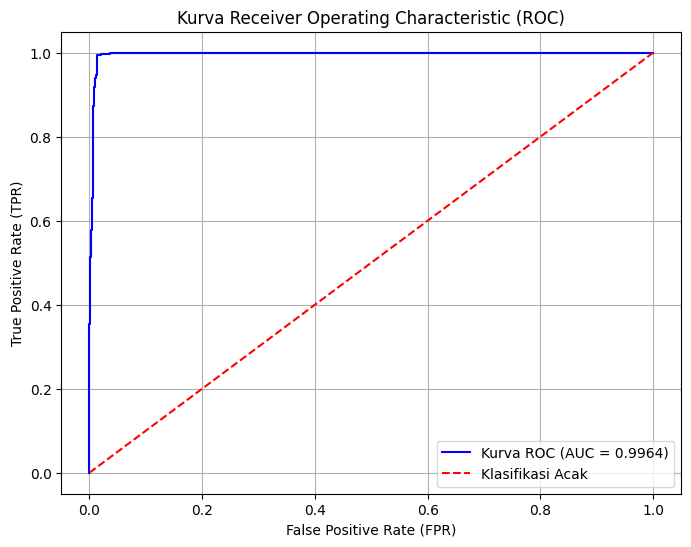

In [15]:
# Diasumsikan 'X_encoded' dan 'y' adalah variabel dari hasil eksekusi Langkah 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score) # <-- Impor fungsi baru
import matplotlib.pyplot as plt # <-- Impor untuk plotting

# 1. Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)

# 2. Melatih Model Klasifikasi (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model Logistic Regression telah berhasil dilatih.")
print("-" * 40)


# 3. Mengevaluasi Kinerja Model pada Data Uji
print("Mengevaluasi model pada data uji...")
y_pred = model.predict(X_test) # Prediksi kelas (0 atau 1)

# ----- BAGIAN BARU: EVALUASI DENGAN AUC-ROC -----

# Dapatkan probabilitas prediksi untuk kelas positif (kelas '1')
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Hitung skor AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Hitung FPR, TPR untuk plotting kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ---------------------------------------------


# Menampilkan hasil evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")
print(f"Skor AUC: {auc_score:.4f}") # <-- Menampilkan skor AUC

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Not Recidivist (0)', 'Recidivist (1)']))

print("\nConfusion Matrix:")
print("                 Prediksi: 0   Prediksi: 1")
cm = confusion_matrix(y_test, y_pred)
print(f"Aktual: 0       {cm[0][0]:<12} {cm[0][1]:<12}")
print(f"Aktual: 1       {cm[1][0]:<12} {cm[1][1]:<12}")


# ----- BAGIAN BARU: PLOTTING KURVA ROC -----

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Kurva ROC (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Klasifikasi Acak')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------

Bagian 1: Analisis Performa (Apa yang Angka Katakan)
Jika kita melihat angka-angka ini secara harfiah, inilah artinya:

Akurasi Model: 0.9812 (98.1%): Model Anda berhasil menebak dengan benar pada 98% kasus di data uji. Ini adalah tingkat akurasi yang sangat tinggi.
Skor AUC: 0.9964: Ini adalah skor yang fenomenal. Ini berarti ada 99.64% kemungkinan model dapat membedakan dengan sempurna antara seseorang yang akan menjadi residivis dan yang tidak. Kurva ROC yang Anda lampirkan, yang hampir menyentuh sudut kiri atas, secara visual mengkonfirmasi hal ini.
Precision & Recall: Keduanya sangat tinggi (di atas 0.96). Ini berarti model hampir tidak pernah salah dalam memprediksi (presisi tinggi) dan hampir tidak pernah melewatkan kasus yang seharusnya ditemukan (recall tinggi).
Confusion Matrix: Angkanya sangat baik. Hanya ada 20 kasus False Positive (salah prediksi akan kambuh) dan hanya 2 kasus False Negative (gagal memprediksi residivis).
Bagian 2: Analisis Kritis (Kesimpulan yang Sebenarnya)
Skor yang setinggi ini untuk masalah sosial yang kompleks seperti prediksi residivisme sangatlah tidak biasa dan merupakan indikasi kuat adanya 'kebocoran data' (Data Leakage).

Apa itu Kebocoran Data?
Ini terjadi ketika model Anda secara tidak sengaja mendapatkan akses ke informasi selama pelatihan yang tidak akan tersedia pada saat prediksi di dunia nyata. Akibatnya, model tidak belajar pola yang sebenarnya, melainkan "menghafal" atau menemukan jalan pintas dari fitur yang membocorkan jawaban.

Di Mana Kebocorannya?
Dalam kasus Anda, fitur yang paling mungkin menjadi penyebab kebocoran data adalah is_recid.

Target Anda adalah two_year_recid (apakah residivisme terjadi dalam 2 tahun).
Fitur is_recid adalah penanda apakah residivisme terjadi kapan saja.
Secara logika, jika is_recid bernilai 1, kemungkinan besar two_year_recid juga 1. Model Anda tidak perlu bekerja keras; ia hanya belajar korelasi yang sangat jelas ini: "Jika is_recid=1, maka prediksi two_year_recid=1".
Fitur lain yang juga membocorkan informasi adalah end dan event, karena keduanya secara langsung berkaitan dengan waktu terjadinya residivisme yang menjadi target prediksi.

Kesimpulan Utama: Kesimpulan yang paling akurat bukanlah bahwa modelnya hebat, melainkan bahwa proses persiapan data memasukkan fitur yang membocorkan informasi tentang target (is_recid). Model tersebut berhasil menemukan 'jalan pintas' ini, sehingga menghasilkan skor performa yang meningkat secara artifisial.

Langkah 1: Pembersihan data selesai.
Jumlah baris setelah pembersihan: 5848
--------------------------------------------------
Langkah 2: Rekayasa fitur dan encoding (setelah perbaikan) selesai.
Jumlah fitur setelah encoding: 23
--------------------------------------------------
Langkah 3: Pelatihan model selesai.
--------------------------------------------------
Mengevaluasi model (hasil yang realistis)...
Akurasi Model: 0.6863
Skor AUC: 0.7334

Laporan Klasifikasi:
                    precision    recall  f1-score   support

Not Recidivist (0)       0.67      0.81      0.74       631
    Recidivist (1)       0.71      0.54      0.61       539

          accuracy                           0.69      1170
         macro avg       0.69      0.68      0.68      1170
      weighted avg       0.69      0.69      0.68      1170



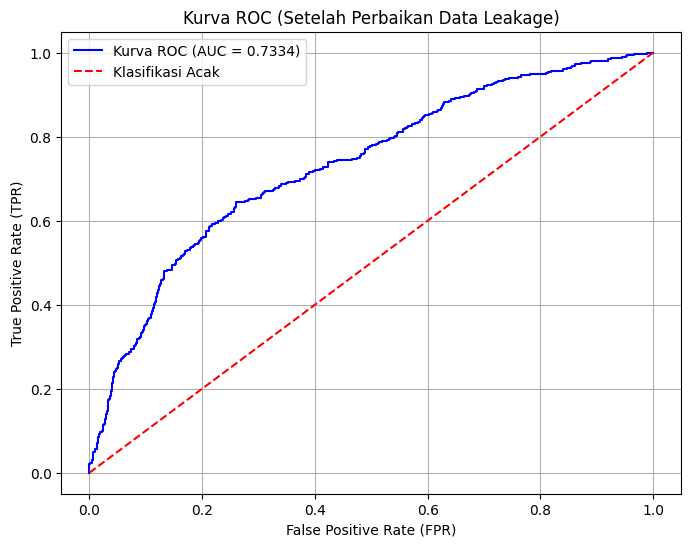

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt

# --- LANGKAH 1: MEMUAT DAN MEMBERSIHKAN DATA (Sama seperti sebelumnya) ---

# Memuat dataset asli


# Definisikan kolom-kolom yang akan dihapus (tidak relevan atau terlalu banyak nilai hilang)
initial_columns_to_drop = [
    'id', 'name', 'first', 'last', 'c_case_number', 'priors_count.1',
    'decile_score.1', 'screening_date', 'violent_recid', 'c_arrest_date',
    'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
    'r_charge_desc', 'r_jail_in', 'r_jail_out', 'vr_case_number',
    'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc'
]

# Filter the columns to drop based on existence in the DataFrame
columns_to_drop_existing = [col for col in initial_columns_to_drop if col in df.columns]

df_cleaned = df.drop(columns=columns_to_drop_existing)

# Hapus baris dengan nilai yang hilang pada kolom-kolom kritis
rows_to_check_for_nan = [
    'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'c_days_from_compas', 'c_charge_desc', 'in_custody', 'out_custody'
]
df_cleaned = df_cleaned.dropna(subset=rows_to_check_for_nan)
print("Langkah 1: Pembersihan data selesai.")
print(f"Jumlah baris setelah pembersihan: {len(df_cleaned)}")
print("-" * 50)


# --- LANGKAH 2: REKAYASA FITUR & ENCODING (Dengan Perbaikan Kebocoran Data) ---

df = df_cleaned.copy()

# Konversi kolom tanggal
date_cols = [
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out',
    'c_offense_date', 'v_screening_date', 'in_custody', 'out_custody'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Rekayasa fitur baru
df['jail_time'] = (df['c_jail_out'] - df['c_jail_in']).dt.total_seconds() / (24 * 3600)
df['age_at_screening'] = (df['compas_screening_date'] - df['dob']).dt.days // 365

# Pisahkan variabel target (y)
y = df['two_year_recid']

# Definisikan fitur yang akan dibuang
features_to_drop = [
    # Kolom tanggal asli
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'v_screening_date', 'in_custody', 'out_custody',
    # Kolom target
    'two_year_recid',
    # Kolom teks deskriptif
    'type_of_assessment', 'v_type_of_assessment', 'c_charge_desc',
    # Kolom 'age' asli
    'age',
    # ========================================================================
    # FIX: Hapus fitur yang membocorkan data (data leakage)
    'is_recid',
    'is_violent_recid',
    'event',
    'start',
    'end'
    # ========================================================================
]

# Filter features_to_drop based on existing columns in df
features_to_drop_existing = [col for col in features_to_drop if col in df.columns]

X_raw = df.drop(columns=features_to_drop_existing)

# Terapkan One-Hot Encoding
X_encoded = pd.get_dummies(X_raw, drop_first=True)
print("Langkah 2: Rekayasa fitur dan encoding (setelah perbaikan) selesai.")
print(f"Jumlah fitur setelah encoding: {X_encoded.shape[1]}")
print("-" * 50)


# --- LANGKAH 3: PELATIHAN DAN EVALUASI MODEL (Hasil yang Realistis) ---

# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)

# Latih model Logistic Regression
# Peringatan 'ConvergenceWarning' mungkin masih muncul, ini adalah isu teknis
# dan tidak berhubungan dengan data leakage. Bisa diabaikan untuk saat ini.
model = LogisticRegression(max_iter=2000) # max_iter dinaikkan untuk coba atasi warning
model.fit(X_train, y_train)
print("Langkah 3: Pelatihan model selesai.")
print("-" * 50)


# Evaluasi Kinerja Model pada Data Uji
print("Mengevaluasi model (hasil yang realistis)...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Model: {accuracy:.4f}")
print(f"Skor AUC: {auc_score:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Not Recidivist (0)', 'Recidivist (1)']))

# Plotting Kurva ROC
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'Kurva ROC (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Klasifikasi Acak')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC (Setelah Perbaikan Data Leakage)')
plt.legend()
plt.grid(True)
plt.show()

Kesimpulan Akhir Analisis Model (Versi Realistis)
Model Regresi Logistik Anda sekarang berfungsi sebagai baseline yang baik dan informatif. Meskipun skornya tidak setinggi sebelumnya, hasil ini nyata dan memberikan wawasan berharga tentang pola dalam data Anda.

1. Analisis Performa Keseluruhan
Skor AUC = 0.7334: Ini adalah metrik terpenting Anda. Skor 0.73 menunjukkan bahwa model memiliki kemampuan prediksi yang cukup baik (fair), jauh lebih unggul daripada tebakan acak (AUC 0.5). Ada 73.3% kemungkinan model Anda akan memberikan skor risiko yang lebih tinggi kepada seseorang yang akan menjadi residivis dibandingkan dengan yang tidak.
Akurasi Model = 0.6863 (68.6%): Secara keseluruhan, model Anda membuat prediksi yang benar untuk sekitar 69% dari semua kasus. Ini adalah titik awal yang solid untuk masalah yang kompleks ini.
2. Wawasan Terdalam dari Laporan Klasifikasi
Di sinilah cerita sebenarnya terungkap:

Kekuatan Model: Model ini relatif baik dalam mengidentifikasi individu yang tidak akan menjadi residivis.
Ia memiliki Recall 0.81 untuk kelas 0, yang berarti model ini berhasil "menemukan" 81% dari semua orang yang memang tidak kambuh.
Kelemahan Terbesar Model: Kelemahan utamanya adalah dalam mendeteksi individu yang akan menjadi residivis.
Ia hanya memiliki Recall 0.54 untuk kelas 1. Ini adalah poin paling kritis: model Anda melewatkan 46% (100% - 54%) dari semua orang yang pada kenyataannya menjadi residivis.
Dalam istilah praktis, ini berarti ada tingkat Negatif Palsu (False Negative) yang tinggi. Model cenderung terlalu sering mengatakan "aman" kepada orang yang sebenarnya berisiko.
Kesimpulan Akhir:
Model Regresi Logistik Anda telah berhasil mempelajari pola-pola nyata dari data untuk memprediksi residivisme. Namun, model ini memiliki kecenderungan untuk lebih "optimis", di mana ia lebih baik dalam memastikan siapa yang berisiko rendah daripada secara akurat menandai siapa yang berisiko tinggi. Kegagalannya untuk mendeteksi hampir separuh dari residivis aktual adalah batasan utamanya.